In [1]:
from geodetector import load_example_data, GeoDetector

# Data loading

In [2]:
df = load_example_data()
df.head()

,incidence,type,region,level
0,5.94,7,5,5
1,5.87,5,5,5
2,5.92,5,5,5
3,6.32,1,7,1
4,6.49,3,2,4


In [3]:
gd = GeoDetector(df, 'incidence')
print(f"Detected factors: {gd.factors}")

Detected factors: ['type', 'region', 'level']


# Factor Detector

In [4]:
gd.factor_detector()

,type,region,level
q statistic,0.385717,0.637774,0.606709
p value,0.363236,0.000117,0.040804


In [5]:
q, p = gd.factor_detector('type')
q, p

(0.385716842809427, 0.363236288149704)

In [6]:
gd.factor_detector(['type', 'region'])

,type,region
q statistic,0.385717,0.637774
p value,0.363236,0.000117


# Interaction Detector

In [7]:
gd.interaction_detector()

,type,region,level
type,0.385717,NaN,NaN
region,0.735681,0.637774,NaN
level,0.663524,0.713597,0.606709


In [8]:
gd.interaction_detector(relationship=True)[1]

,type,region,level
type,NaN,NaN,NaN
region,"Enhance, bi-",NaN,NaN
level,"Enhance, bi-","Enhance, bi-",NaN


In [9]:
gd.interaction_detector(factors=['type', 'region'])

,type,region
type,0.385717,NaN
region,0.735681,0.637774


In [10]:
gd.interaction_detector('type', 'region')

0.7356805481395312

In [11]:
gd.interaction_detector('type', 'region', relationship=True)

(0.7356805481395312, 'Enhance, bi-')

# Ecological Detector

In [12]:
gd.ecological_detector()

,type,region,level
type,NaN,NaN,NaN
region,Y,NaN,NaN
level,Y,N,NaN


In [13]:
gd.ecological_detector('region', 'type')

'Y'

In [14]:
gd.ecological_detector('type', 'region')

'N'

In [15]:
gd.ecological_detector(factors=['type', 'region'])

,type,region
type,NaN,NaN
region,Y,NaN


In [16]:
gd.ecological_detector(factors=['region', 'type', 'level'])

,region,type,level
region,NaN,NaN,NaN
type,N,NaN,NaN
level,N,Y,NaN


# Risk Detector

In [17]:
risk_result = gd.risk_detector()

In [18]:
risk_result['type']['risk']

type
1    6.340000
2    6.687500
3    6.583279
5    5.843810
7    6.347073
Name: incidence, dtype: float64

In [19]:
risk_result['type']['ttest_stra']

,1,2,3,5,7
1,True,True,True,True,True
2,True,True,True,True,True
3,True,False,True,True,True
5,True,True,True,True,True
7,False,True,True,True,True


In [20]:
gd.risk_detector('type')['risk']

type
1    6.340000
2    6.687500
3    6.583279
5    5.843810
7    6.347073
Name: incidence, dtype: float64

# Plotting

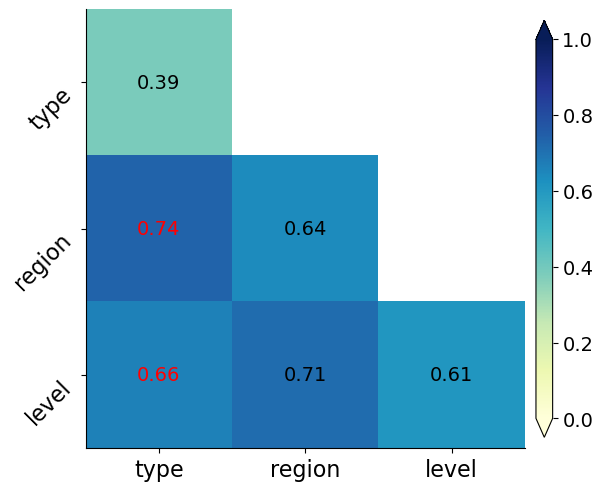

In [21]:
gd.plot(value_fontsize=14, tick_fontsize=16, colorbar_fontsize=14);

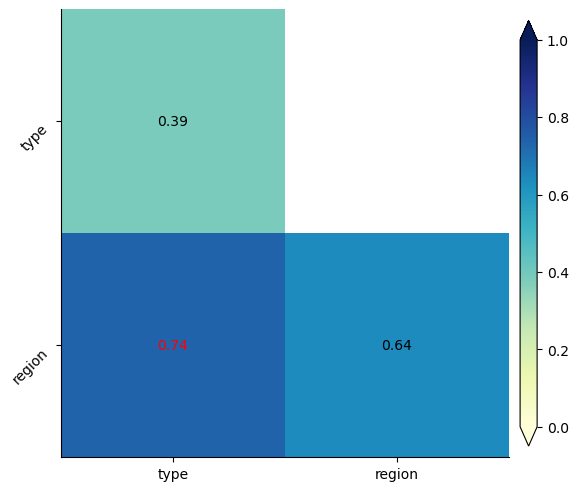

In [22]:
gd.plot(factors=['type', 'region']);